In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data and sort by date

In [2]:
data = pd.read_csv('phq_all_final.csv')

In [3]:
data

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9
...,...,...,...,...,...
53693,2020-07-31T13:59:13.201741,10683,gad7,2020-07-31T13:54:20.164253,1
53694,2020-07-31T15:08:56.079027,12344,gad7,2020-07-31T15:06:51.04373,1
53695,2020-07-31T15:52:50.353265,17475,gad7,2020-07-31T15:40:07.726529,7
53696,2020-07-31T17:36:57.057913,9069,gad7,2020-07-31T17:33:27.096572,3


In [4]:
data.sort_values('date', inplace=True)

In [5]:
data

,date,patient_id,type,patient_date_created,score
58,2019-06-06T16:31:34.960999,9834,gad7,2019-06-04T13:20:52.492773,15
52,2019-06-07T07:17:53.394337,9130,gad7,2019-06-03T21:14:27.6175,0
7,2019-06-07T13:05:01.435941,3788,gad7,2019-06-03T14:48:09.129756,0
132,2019-06-09T16:44:23.212699,3915,gad7,2019-06-04T19:22:24.75424,4
140,2019-06-09T22:54:50.120132,16617,gad7,2019-06-04T19:28:38.734048,12
...,...,...,...,...,...
47174,2020-07-31T19:53:45.98809,9662,gad7,2020-04-06T22:04:28.746347,7
33461,2020-07-31T20:01:26.115163,999,gad7,2020-02-04T21:40:55.624196,3
50156,2020-07-31T20:01:56.773677,12696,gad7,2020-05-05T19:50:04.906831,4
43895,2020-07-31T20:05:53.520605,2912,gad7,2020-03-23T16:08:39.976328,4


## Check how many types there are

In [7]:
data['type'].value_counts()

gad7    53698
Name: type, dtype: int64

Since there is only one, this column doesn't provide any information

## Remove the patients that have only one score and plot the dynamics for random patients

In [8]:
single_observation_patients = data['patient_id'].value_counts()[data['patient_id'].value_counts() == 1].index
data = data[~data['patient_id'].isin(single_observation_patients)]

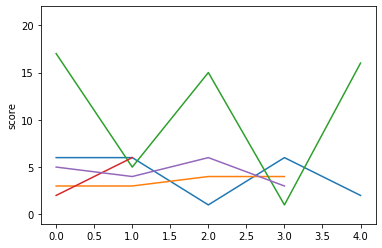

In [131]:
for _ in range(5):
    patient = np.random.choice(data['patient_id'].unique())
    scores = data[data['patient_id'] == patient]['score']
    sns.lineplot(range(len(scores)), scores).set(ylim=(-1, 22))

## Plot the distribution of patient_date_created and distribution of scores over time

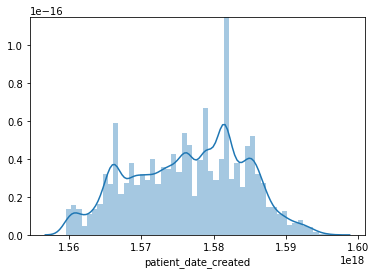

In [10]:
sns.distplot(pd.to_datetime(data['patient_date_created']))

In [15]:
data['patient_date_created'].min(), data['patient_date_created'].max()

('2019-06-03T13:23:02.63568', '2020-07-31T17:58:21.004418')

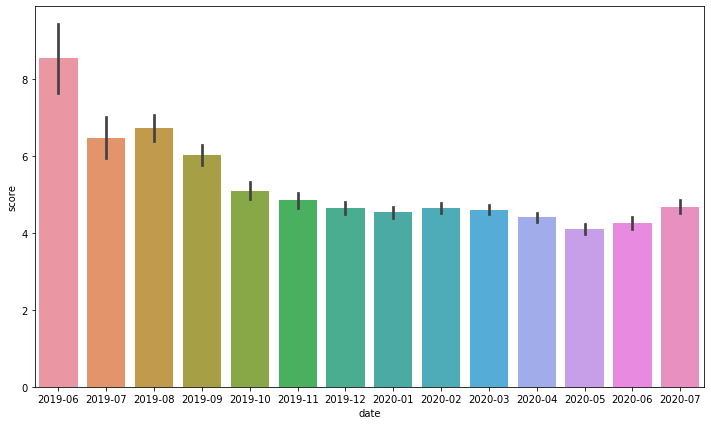

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(pd.to_datetime(data['date']).dt.to_period('M'), data['score'])

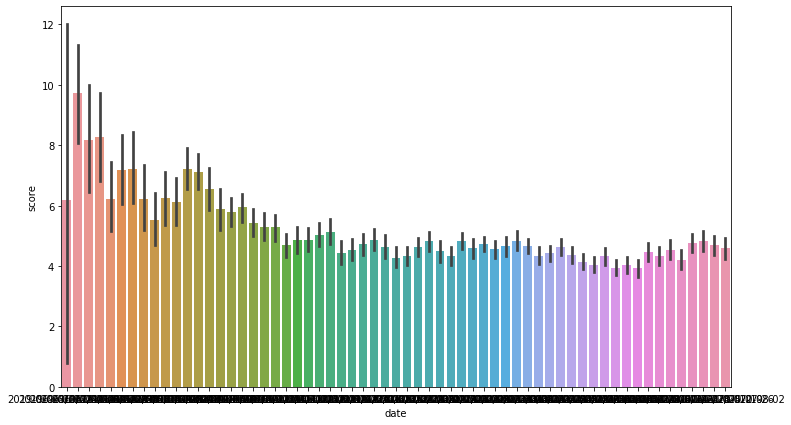

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(pd.to_datetime(data['date']).dt.to_period('W'), data['score'])

In [32]:
# Check if there are enouh samples for each week to make any conclusions
pd.to_datetime(data['date']).dt.to_period('W').value_counts()

2020-03-23/2020-03-29    1768
2020-02-24/2020-03-01    1701
2020-04-06/2020-04-12    1563
2020-04-13/2020-04-19    1509
2020-04-20/2020-04-26    1402
                         ... 
2019-07-01/2019-07-07      73
2019-06-24/2019-06-30      65
2019-06-17/2019-06-23      46
2019-06-10/2019-06-16      39
2019-06-03/2019-06-09       5
Freq: W-SUN, Name: date, Length: 61, dtype: int64

The average score decreases over time and starts increasing a little at the end. This may indicate the trend of average well-being in the population. The last few months of the data are the first few months of COVID-related measures.

## Get average difference in scores per patient

In [105]:
diff_on_scond_test = data.groupby('patient_id').apply(lambda x: x['score'].iloc[1] - x['score'].iloc[0])
average_diff = data.groupby('patient_id').apply(lambda x: x['score'].diff(1).mean())
average_diff_sign = data.groupby('patient_id').apply(lambda x: (x['score'].diff(1)[1:]>0).mean())

In [116]:
average_diff.sort_values()

patient_id
17088   -20.0
9877    -20.0
4119    -16.0
1604    -16.0
14294   -16.0
         ... 
6409     15.0
3828     15.0
396      16.0
7697     16.0
1817     18.0
Length: 10905, dtype: float64

In [125]:
(average_diff.abs() > 10).sum()

152

There are some patients with extreme changes in scores. These cases require individual investigation. I remove them from the data to reduce the noise that they create.

In [133]:
tmp = average_diff.abs() > 10
tmp = tmp[tmp].index
data = data[~data['patient_id'].isin(tmp)]

In [134]:
diff_on_scond_test = data.groupby('patient_id').apply(lambda x: x['score'].iloc[1] - x['score'].iloc[0])
average_diff = data.groupby('patient_id').apply(lambda x: x['score'].diff(1).mean())
average_diff_sign = data.groupby('patient_id').apply(lambda x: (x['score'].diff(1)[1:]>0).mean())

In [135]:
diff_on_scond_test.mean()

-0.4097845186349764

In [136]:
average_diff.mean()

-0.23571339103145808

In [137]:
average_diff_sign.mean()

0.3550609485142684

Average sign of the difference being positive indicates that for most assesments the score is larger than for the previous. However, average difference between consecutive scores is negative. It means that scores go up more often, but when they go down, the amount of change is larger.

## Split patients into severe, moderate and mild categories and check score differences for each group

In [86]:
is_severe = data.groupby('patient_id')['score'].max() >= 16
severe_patients = is_severe[is_severe].index

is_moderate = (data.groupby('patient_id')['score'].max() < 16) & (data.groupby('patient_id')['score'].max() >= 11)
moderate_patients = is_moderate[is_moderate].index

is_mild = (data.groupby('patient_id')['score'].max() < 11) & (data.groupby('patient_id')['score'].max() >= 6)
mild_patients = is_mild[is_mild].index

In [89]:
severe_data = data[data['patient_id'].isin(severe_patients)]
moderate_data = data[data['patient_id'].isin(moderate_patients)]
mild_data = data[data['patient_id'].isin(mild_patients)]

In [104]:
groups = [severe_data, moderate_data, mild_data]
labels = ['Severe', 'Moderate', 'Mild']
for i in range(len(groups))
    group = groups[i]
    diff_on_scond_test = group.groupby('patient_id').apply(lambda x: x['score'].iloc[1] - x['score'].iloc[0])
    average_diff = group.groupby('patient_id').apply(lambda x: x['score'].diff(1).mean())
    average_diff_sign = group.groupby('patient_id').apply(lambda x: (x['score'].diff(1)[1:]>0).mean())
    
    print(labels[i] + ': ')
    print('Average diff on second test: ', diff_on_scond_test.mean())
    print('Average diff overall: ', average_diff.mean())
    print('Average diff sign: ', average_diff_sign.mean(), '\n')

Severe: 
Average diff on second test:  -0.5930984902947519
Average diff overall:  -0.43555923821826575
Average diff sign:  0.41779729383085296 

Moderate: 
Average diff on second test:  -0.8688524590163934
Average diff overall:  -0.5240823137135882
Average diff sign:  0.40921210841205763 

Mild: 
Average diff on second test:  -0.5234345706786652
Average diff overall:  -0.2983479961350614
Average diff sign:  0.40080869188299506 



For moderate group the score difference is the largest, both after the second assesment and overall. Mild group has the smallest change in scores. Either the treatment is more effective for more severe cases or the assesments are designed in such a way that small changes in severe cases are more accentuated.

For further investigation of the data it would be useful to have information on which care provider is working with the patient and which treatment approaches are used. This would allow to compare them and asses whether some of them are more effective than the others.